# ODE RLC circuit

This notebook shows how to solve numerically a second order ODE of a RLC series circuit.

<img src="images/RLC_series_circuit_v1.png" alt="Drawing" style="width: 300px;"/>

We define

- $u(t)$ input voltage
- $x(t)$ voltage over the capacitor to the ground

In [5]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

We have a second order ODE:

\begin{align}
LC \ddot{x} + RC \dot{x} + x = u(t)
\end{align}

In oder to calculate a numerical solution we have to rearrange the second order equation into a system of first order ODEs. A system of first order ODEs can be solved with Euler method.

We rewrite the ODE so that the highest order is the first - we substitute $v=\dot{x}$:

\begin{align}
LC \dot{v} + RC v + x = u(t)
\end{align}

The final ODE system is:

\begin{align}
\dot{v} = \frac{u(t) - RC v - x}{LC} \\
\dot{x} = v
\end{align}

In [137]:
# imitates European line voltage
def input_signal(t):
    return 230*np.sin(2*np.pi*100*t)

In [138]:
R = 100; C = 1e-3; L = 100e-3

In [139]:
def ode_right_side(t, vars):
    v, x = vars[0], vars[1]
    vdot = (input_signal(t) - R*C*v - x)/(L*C)
    xdot = v
    return np.r_[vdot, xdot]

In [140]:
initial_state = np.r_[0, 0]

In [141]:
integral_range = [0, 1]

In [142]:
eval_times = np.linspace(0, 1, 10000)

In [143]:
result = solve_ivp(ode_right_side, integral_range, y0=initial_state, t_eval=eval_times)

(0, 0.5)

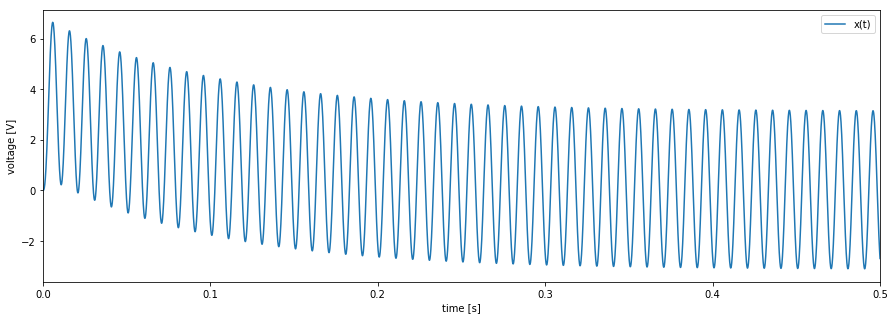

In [146]:
plt.figure(figsize=(15,5))
plt.plot(result.t, result.y[1, :], label="x(t)")
plt.xlabel("time [s]")
plt.ylabel("voltage [V]")
plt.legend()
plt.xlim([0, 0.5])

In [147]:
# imitates step function from t > 0
def input_signal(t):
    return 230

In [148]:
result = solve_ivp(ode_right_side, integral_range, y0=initial_state, t_eval=eval_times)

(0, 0.5)

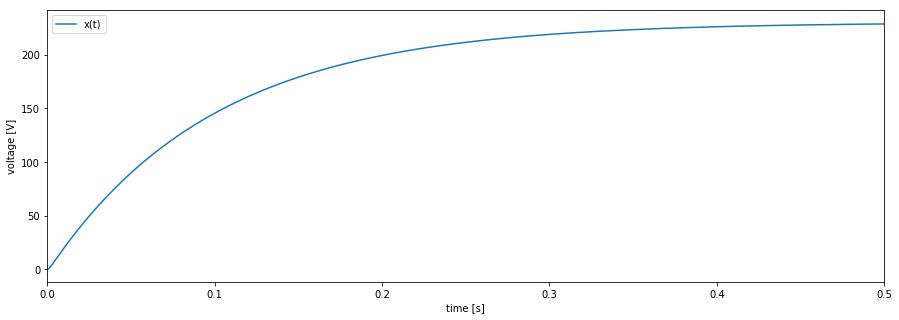

In [149]:
plt.figure(figsize=(15,5))
plt.plot(result.t, result.y[1, :], label="x(t)")
plt.xlabel("time [s]")
plt.ylabel("voltage [V]")
plt.legend()
plt.xlim([0, 0.5])